In [1]:
import pandas as pd
import json
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("white")

## Load Data + Create Pivots

In [2]:
adult = (pd.read_csv('defaultEqOp.csv')
         .drop('Unnamed: 0', axis = 1)
         .assign(eqOp=lambda df: df.eqOpTrue*0.67+df.eqOpFalse*.33,
                eqOpTrain=lambda df: df.eqOpTrue_train*0.67+df.eqOpFalse_train*.33))

dataset = "Default"
results_path ='default_eqop/'

In [39]:
adult_eps = (adult[adult.epsilon > 0]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_compl = (adult[adult.epsilon > 0]
           .sort_values(by='complexity', ascending=True)
           .groupby(['complexity'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_eps_test = (adult
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

## Fairness Story

In [4]:
#wide = adult_eps[['epsilon', 'eqOpTrue_train', 'eqOpTrue']].set_index('epsilon')
#sns.lineplot(wide)

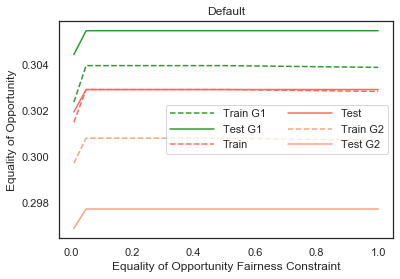

In [5]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOp', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Equality of Opportunity')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpCurve.pdf',dpi=300)

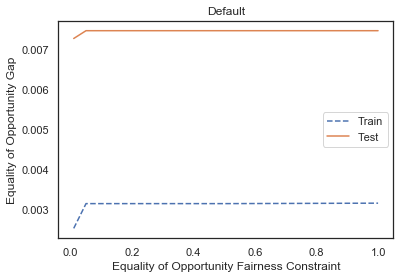

In [6]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax.lines[0].set_linestyle("--")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_eqOpGap.pdf',dpi=300)

## Accuracy Story

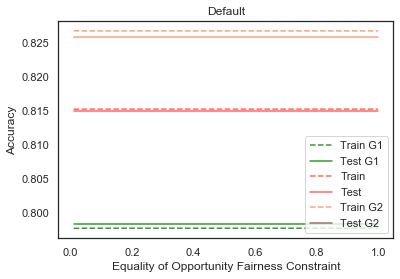

In [7]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracy.pdf',dpi=300)

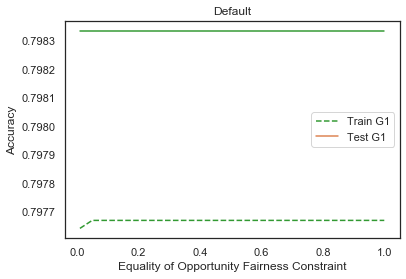

In [8]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG1.pdf',dpi=300)

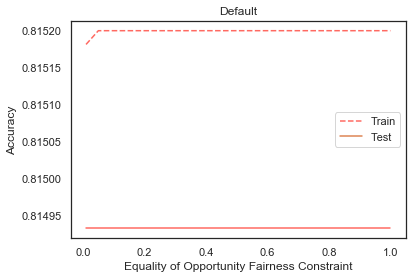

In [9]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[1].set_color("#ff6961")

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyOverall.pdf',dpi=300)

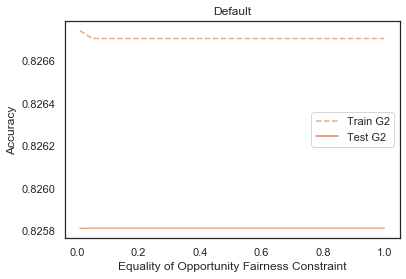

In [10]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[1].set_color("#f4a582")

sns.mpl.pyplot.xlabel('Equality of Opportunity Fairness Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG2.pdf',dpi=300)

In [11]:
adult_eps_test = adult_eps_test.append(pd.DataFrame({'eps_test':[1], 'cumAcc': [adult_eps_test.cumAcc.max()]}))

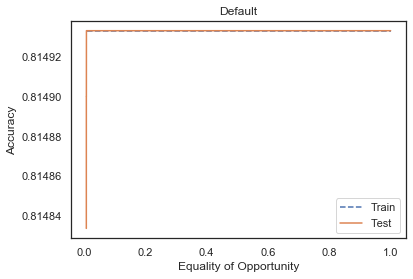

In [12]:
#add std. dev. + complete to trivial
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'cumAcc', label = 'Train')
ax.lines[0].set_linestyle("--")

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Test')
sns.mpl.pyplot.xlabel('Equality of Opportunity')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyFairTradeOff.pdf',dpi=300)

## Complexity Story

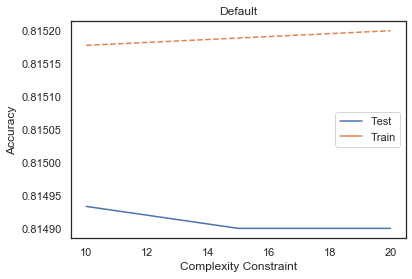

In [13]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyComplexity.pdf',dpi=300)

Text(0.5, 1.0, 'Default')

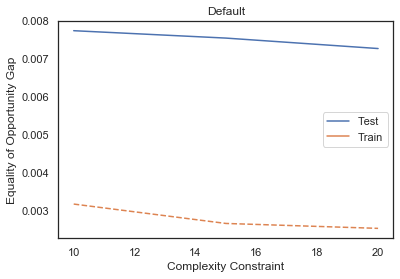

In [14]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_test', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap')
sns.mpl.pyplot.title(dataset)


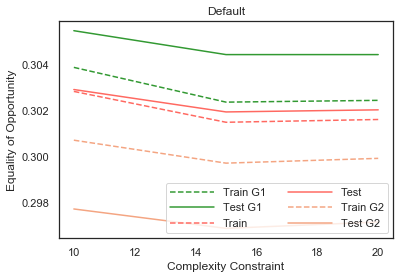

In [15]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOp', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='lower right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Equality of Opportunity')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpComplexity.pdf',dpi=300)

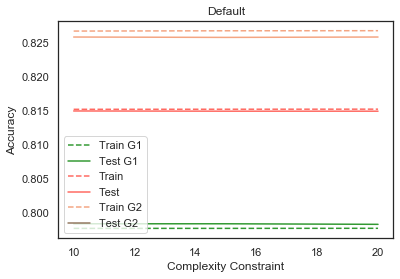

In [16]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_complexityGroupAccuracy.pdf',dpi=300)

## Comparison Story

In [41]:
benchmarks = (pd.read_csv('benchmark_default.csv')
              .drop('Unnamed: 0', axis=1)
              .append(pd.DataFrame({'algo':['logreg','cart','cart'], 
                                   'cumAcc':[0.778767,0.778767,0.778767], 
                                   'EqOfOp':[0.054,0,0.025]})))

adult_eps_test =adult_eps_test.append(pd.DataFrame({'eps_test':[0.054,0,0.0072], 
                                   'cumAcc':[0.815,0.778767,0.778767]}))

In [40]:
adult_eps_test.eps_test.min()

0.007272762665541999

In [31]:
benchmarks[benchmarks.algo == 'cart'].EqOfOp.max()

0.05439529942335978

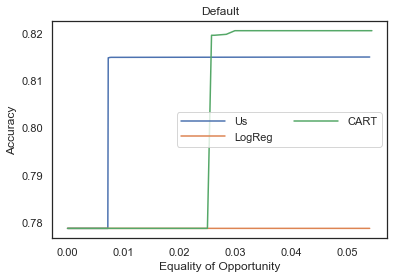

In [43]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
ax = sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')
sns.mpl.pyplot.xlabel('Equality of Opportunity')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

plt.savefig(results_path+dataset+'_benchmark.pdf',dpi=300)

In [20]:
1/0

ZeroDivisionError: division by zero

# ROUGH

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')
plt.savefig("adult_EpsVAccuracy.png")

In [ ]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')
plt.savefig("adult_EpsVEqOp.png")

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')

In [ ]:
#Good chart
#Throw in population

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity Trrain (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
#Good chart - tradeoff between interpret. and fairness
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'ip')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
#add std. dev. + complete to trivial
benchmarks = pd.read_csv('benchmark_adult.csv')

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')